In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa as tsa
import statsmodels as sm
from datetime import datetime
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.layers import LSTM
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [205]:
tf.random.set_seed(123)
dateparse = lambda dates: pd.to_datetime(dates, format='%Y-%m')

dateparse = lambda dates: pd.to_datetime(dates, format='%b/%Y')
consumo = pd.read_csv('consumo_normalizado.csv', parse_dates=['Fecha'], date_parser=dateparse)

# Mostrar los primeros datos para confirmar la lectura
print(consumo.head())

       Fecha  Aceites lubricantes  Asfalto     Bunker  Ceras  \
0 2000-01-01                  0.0  48446.0  296766.99    0.0   
1 2000-02-01                  0.0  50597.0  328116.44    0.0   
2 2000-03-01                  0.0  27593.0  368589.63    0.0   
3 2000-04-01                  0.0  53794.0  396300.47    0.0   
4 2000-05-01                  0.0  60137.0  449368.92    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Kerosina  \
0                194410.48                1426.0  ...  64026.09   
1                174710.55          

C:\Users\josea\AppData\Local\Temp\ipykernel_9788\4100967590.py:5: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  consumo = pd.read_csv('consumo_normalizado.csv', parse_dates=['Fecha'], date_parser=dateparse)


In [206]:

print(consumo.head())





       Fecha  Aceites lubricantes  Asfalto     Bunker  Ceras  \
0 2000-01-01                  0.0  48446.0  296766.99    0.0   
1 2000-02-01                  0.0  50597.0  328116.44    0.0   
2 2000-03-01                  0.0  27593.0  368589.63    0.0   
3 2000-04-01                  0.0  53794.0  396300.47    0.0   
4 2000-05-01                  0.0  60137.0  449368.92    0.0   

   Combustible turbo jet  Diesel bajo azufre  Diesel ultra bajo azufre  \
0                    0.0                 0.0                       0.0   
1                    0.0                 0.0                       0.0   
2                    0.0                 0.0                       0.0   
3                    0.0                 0.0                       0.0   
4                    0.0                 0.0                       0.0   

   Gas licuado de petróleo  Gasolina de aviación  ...  Kerosina  \
0                194410.48                1426.0  ...  64026.09   
1                174710.55          

In [207]:

print(consumo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Fecha                     294 non-null    datetime64[ns]
 1   Aceites lubricantes       294 non-null    float64       
 2   Asfalto                   294 non-null    float64       
 3   Bunker                    294 non-null    float64       
 4   Ceras                     293 non-null    float64       
 5   Combustible turbo jet     294 non-null    float64       
 6   Diesel bajo azufre        294 non-null    float64       
 7   Diesel ultra bajo azufre  294 non-null    float64       
 8   Gas licuado de petróleo   294 non-null    float64       
 9   Gasolina de aviación      294 non-null    float64       
 10  Gasolina regular          294 non-null    float64       
 11  Gasolina superior         294 non-null    float64       
 12  Grasas lubricantes    

In [208]:

print(consumo.describe())

                               Fecha  Aceites lubricantes       Asfalto  \
count                            294           294.000000    294.000000   
mean   2012-03-16 18:31:50.204081664          5272.625918  28120.807925   
min              2000-01-01 00:00:00             0.000000   2287.930000   
25%              2006-02-08 00:00:00             0.000000  17070.962500   
50%              2012-03-16 12:00:00             0.000000  25626.830000   
75%              2018-04-23 12:00:00             0.000000  35575.995000   
max              2024-06-01 00:00:00         31025.180000  77035.870000   
std                              NaN          9991.187357  15135.399729   

              Bunker       Ceras  Combustible turbo jet  Diesel bajo azufre  \
count     294.000000  293.000000             294.000000        2.940000e+02   
mean   301938.037619  -13.926041           38191.794694        3.043604e+05   
min     33606.200000 -841.640000               0.000000        0.000000e+00   
25%    1

In [209]:
consumo.isnull().sum()

Fecha                       0
Aceites lubricantes         0
Asfalto                     0
Bunker                      0
Ceras                       1
Combustible turbo jet       0
Diesel bajo azufre          0
Diesel ultra bajo azufre    0
Gas licuado de petróleo     0
Gasolina de aviación        0
Gasolina regular            0
Gasolina superior           0
Grasas lubricantes          0
Kerosina                    0
Mezclas oleosas             0
Naftas                      0
PetCoke                     0
Petróleo crudo              0
Solventes                   0
Butano                      0
Diesel alto azufre          0
Orimulsión                  0
Total                       0
dtype: int64

In [210]:
consumo = consumo.fillna(consumo.mean())  # Rellena con la media de la columna

In [211]:
consumo_drop =consumo.drop(columns='Ceras')
consumo_regular= consumo_drop[['Fecha', 'Gasolina regular']]

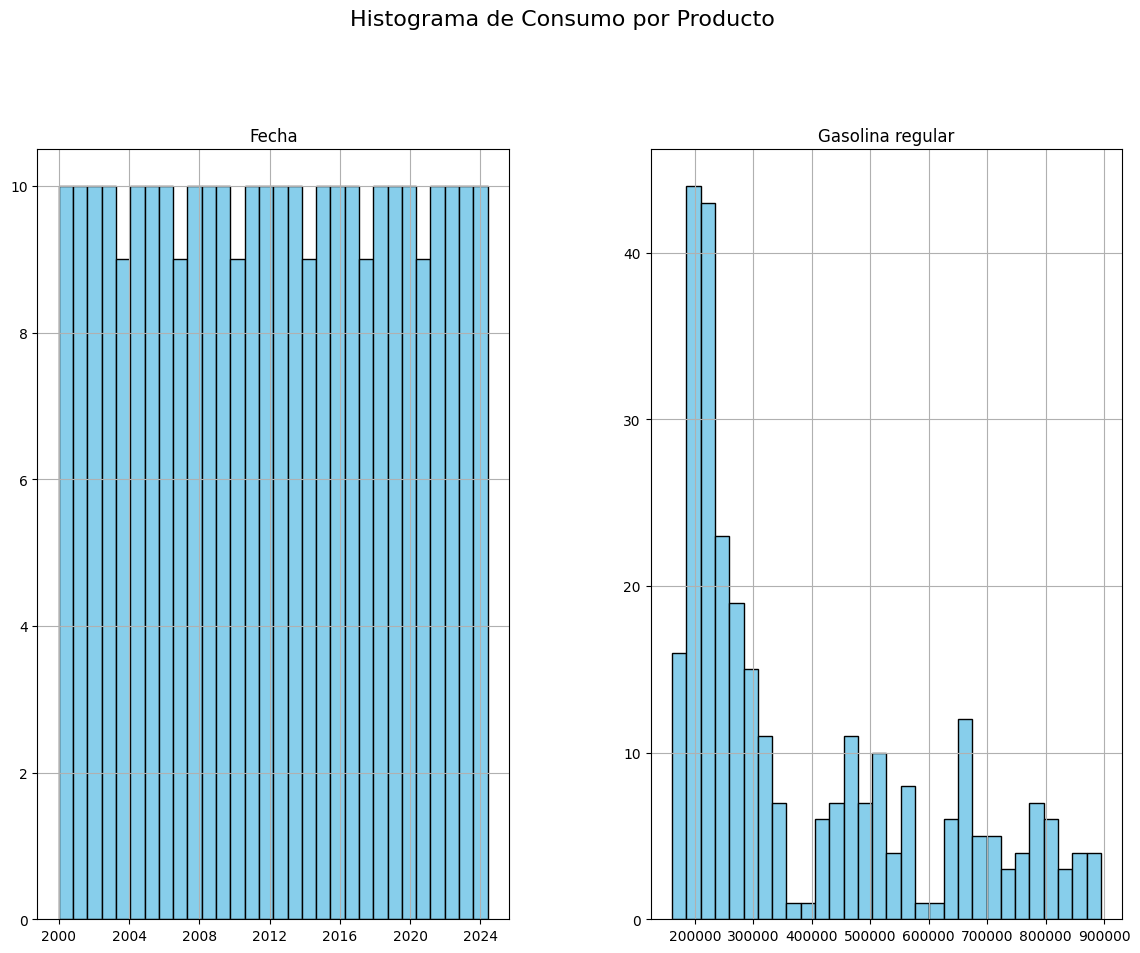

In [212]:
consumo_regular.hist(figsize=(14, 10), bins=30, color='skyblue', edgecolor='black')
plt.suptitle('Histograma de Consumo por Producto', y=1.02, fontsize=16)
plt.show()

In [213]:
consumo_regular.head()

,Fecha,Gasolina regular
0,2000-01-01,202645.20
1,2000-02-01,205530.96
2,2000-03-01,229499.56
3,2000-04-01,210680.40
4,2000-05-01,208164.34


In [231]:
consumo_regular.set_index('Fecha', inplace=True)

# Comprobar el índice
print(consumo_regular.index)

DatetimeIndex(['2000-01-01', '2000-02-01', '2000-03-01', '2000-04-01',
               '2000-05-01', '2000-06-01', '2000-07-01', '2000-08-01',
               '2000-09-01', '2000-10-01',
               ...
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01'],
              dtype='datetime64[ns]', name='Fecha', length=294, freq=None)


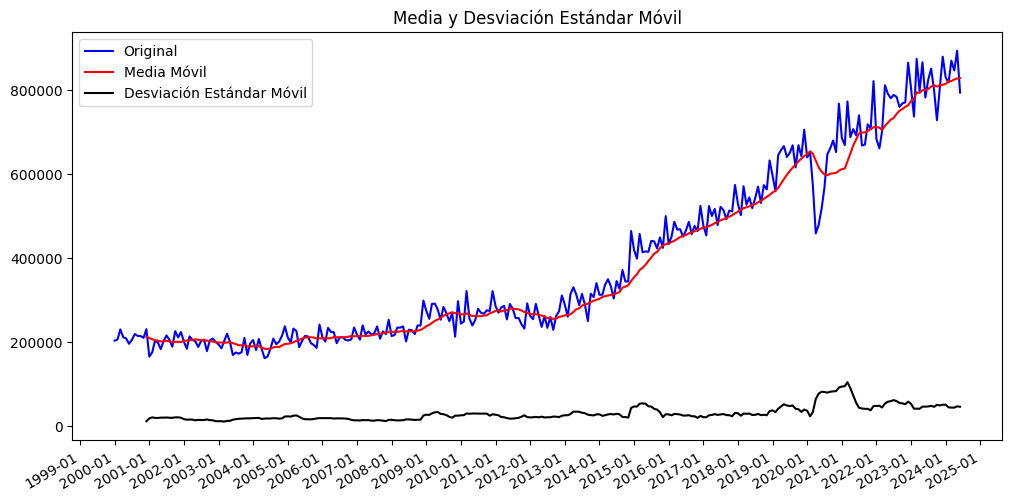

In [232]:
import matplotlib.dates as mdates
mediaMovil = consumo_regular['Gasolina regular'].rolling(window=12).mean()
deMovil = consumo_regular['Gasolina regular'].rolling(window=12).std()

# Configura el gráfico
plt.figure(figsize=(12, 6))
plt.plot(consumo_regular.index, consumo_regular['Gasolina regular'], color="blue", label="Original")
plt.plot(consumo_regular.index, mediaMovil, color='red', label='Media Móvil')
plt.plot(consumo_regular.index, deMovil, color='black', label='Desviación Estándar Móvil')

# Formatear el eje x para que muestre las fechas correctamente
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.gcf().autofmt_xdate()  # Rotar las fechas para mejor visibilidad

# Añadir leyenda y título
plt.legend(loc='best')
plt.title('Media y Desviación Estándar Móvil')
plt.show()

In [215]:
consumo_regular.isnull().sum()
consumo_regular['Gasolina regular'] = consumo_regular['Gasolina regular'].interpolate()


C:\Users\josea\AppData\Local\Temp\ipykernel_9788\716949643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consumo_regular['Gasolina regular'] = consumo_regular['Gasolina regular'].interpolate()


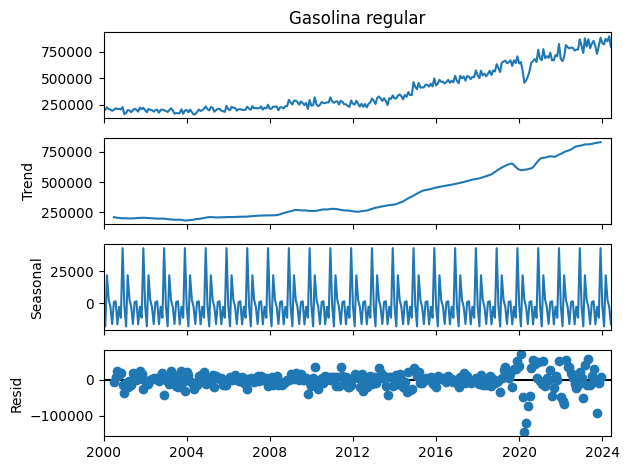

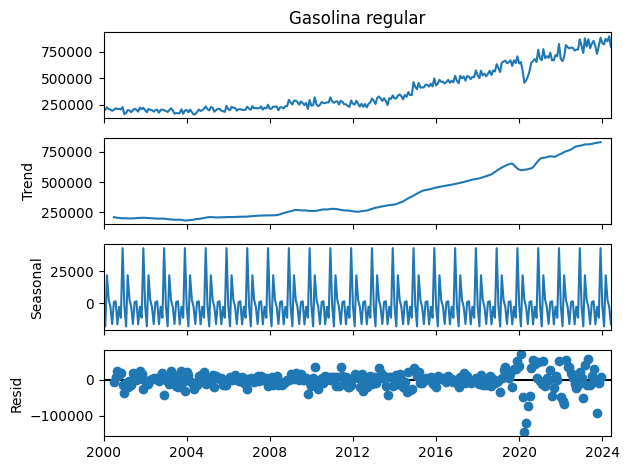

In [233]:

# Descomponer la serie temporal
descomposicion = seasonal_decompose(consumo_regular['Gasolina regular'], model='additive')  # Puedes usar 'multiplicative' si es más adecuado
descomposicion.plot()

### En este gráfico se puede observar que hay tendencia por lo que la serie no parece ser estacionaria en media y tampoco en varianza.

In [217]:
print('Resultados del Test de Dickey Fuller')
dfTest = adfuller(consumo_regular['Gasolina regular'], autolag='AIC')
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller
Estadístico de prueba          2.430669
p-value                        0.999024
# de retardos usados          14.000000
# de observaciones usadas    279.000000
Critical Value (1%)           -3.454008
Critical Value (5%)           -2.871956
Critical Value (10%)          -2.572320
dtype: float64



El p-value es mayor a 0.05 por lo que no se puede rechazar la hipótesis nula de que existen raices unitarias. La serie no es estacionaria en media. Vamos a probar con una diferenciación

In [218]:
print('Resultados del Test de Dickey Fuller para una diferenciación de la serie')
ts_consumo_diff = consumo_regular['Gasolina regular'].diff()
ts_consumo_diff.fillna(0,inplace=True)
dfTest = adfuller(ts_consumo_diff)
salidaDf = pd.Series(dfTest[0:4], index=['Estadístico de prueba','p-value','# de retardos usados','# de observaciones usadas'])
for key,value in dfTest[4].items():
        salidaDf['Critical Value (%s)'%key] = value
print(salidaDf)

Resultados del Test de Dickey Fuller para una diferenciación de la serie
Estadístico de prueba         -4.316925
p-value                        0.000415
# de retardos usados          16.000000
# de observaciones usadas    277.000000
Critical Value (1%)           -3.454180
Critical Value (5%)           -2.872031
Critical Value (10%)          -2.572360
dtype: float64


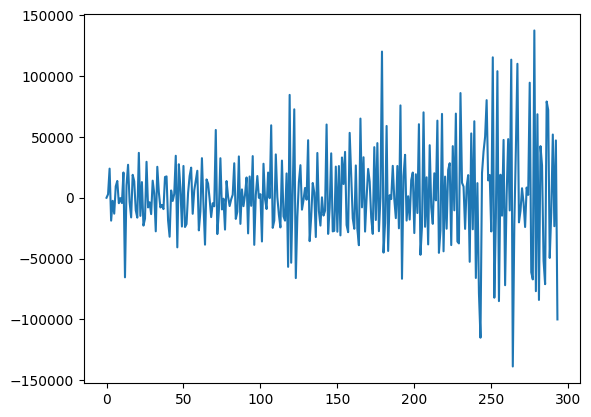

In [219]:
plt.plot(ts_consumo_diff)

In [220]:
ts_consumo_diff_df = ts_consumo_diff.to_frame()

# Escalar los datos
scaler = StandardScaler()
ts_consumo_scaled = scaler.fit_transform(ts_consumo_diff_df)

# Ver los primeros 6 valores escalados
ts_consumo_scaled[1:7]

array([[ 0.02243926],
       [ 0.56436912],
       [-0.53548104],
       [-0.11641336],
       [-0.38784406],
       [ 0.19163509]])

In [221]:
entrenamiento = round(0.6*len(ts_consumo_scaled))
val_prueba = round(0.2*len(ts_consumo_scaled))
test = ts_consumo_scaled[(entrenamiento+val_prueba)-1:]
validation = ts_consumo_scaled[(entrenamiento):entrenamiento+val_prueba+1]
train = ts_consumo_scaled[0:entrenamiento]
train=np.insert(train,0,0)
train=np.reshape(train,(train.shape[0],1))
len(test)

60

# Transformar serie a supervisada

In [222]:
from operator import concat


def supervisada(serie,retrasos = 1):
    serie_x = []
    serie_y = []
    for i in range(len(serie)-retrasos):
        valor = serie[i:(i+retrasos),0]
        valor_sig = serie[i+retrasos,0]
        serie_x.append(valor)
        serie_y.append(valor_sig)
    return np.array(serie_x), np.array(serie_y)

x_train,y_train = supervisada(train)
x_val,y_val = supervisada(validation)
x_test,y_test = supervisada(test)



In [223]:
x_train = np.reshape(x_train,(x_train.shape[0],1,1))
x_val = np.reshape(x_val, (x_val.shape[0],1,1))
x_test = np.reshape(x_test, (x_test.shape[0],1,1))
len(x_val)

59

In [224]:
# Definir los parámetros
unidades = 1
paso = 1
caracteristicas = 1  # Es univariada

# Crear el modelo LSTM
modelo1 = Sequential()
modelo1.add(LSTM(units=unidades, input_shape=(paso, caracteristicas)))
modelo1.add(Dense(1))
modelo1.summary()

c:\Users\josea\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_22 (LSTM)                  │ (None, 1)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [225]:
modelo1.compile(loss='mean_squared_error',optimizer="rmsprop")

In [226]:
lote = 1
epocas = 50
history= modelo1.fit(
    x = x_train,
    y = y_train,
    batch_size = lote,
    epochs = epocas,
    shuffle = False,
    validation_data = (x_val,y_val),
    verbose=1
)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3061 - val_loss: 1.0193
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step - loss: 0.3053 - val_loss: 1.0189
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - loss: 0.3044 - val_loss: 1.0160
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - loss: 0.3032 - val_loss: 1.0106
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - loss: 0.3015 - val_loss: 1.0025
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step - loss: 0.2993 - val_loss: 0.9922
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - loss: 0.2966 - val_loss: 0.9798
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 556us/step - loss: 0.2936 - val_loss: 0.9659
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.2902 - val_loss: 0.9508
Epoch 10/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - loss: 0.2867 - val_loss: 0.9350
Epoch 11/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - loss: 0.2831 - val_loss: 0.9190
Epoch 12/50
176/176 ━━━━━━━━━━━━

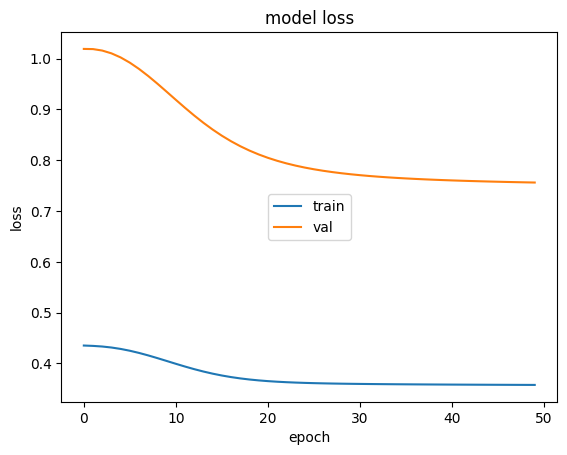

In [227]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='center')

In [228]:
print("Pérdida en Entrenamiento")
modelo1.evaluate(
    x = x_train,
    y = y_train
)
print("Pérdida en Validación")
modelo1.evaluate(
    x = x_val,
    y = y_val
)
print("Pérdida en Prueba")
modelo1.evaluate(
    x = x_test,
    y = y_test
)

Pérdida en Entrenamiento
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/step - loss: 0.2939
Pérdida en Validación
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7587 
Pérdida en Prueba
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.2555 


2.278503894805908

# Predecir con primer modelo

In [239]:
prediccion_val = []

def prediccion_fun(data,modelo, batch_size,scaler,dif=False,dif_cant=1, Series = None , n=1):
    prediccion = [0]* (len(data))
    i=0
    for X in data:
        X = np.reshape(X,(1,1,1))
        yhat = modelo1.predict(X, batch_size=batch_size,verbose=0)
        # invert scaling
        yhat = scaler.inverse_transform(yhat)
        if dif:
             # invert differencing
            yhat  = yhat + Series[(n+dif_cant*i)]
        # store
        prediccion[i]=yhat[0][0]
        i = i+1
    return prediccion
prediccion_val = prediccion_fun(x_val,modelo1, 1,scaler,dif=True,dif_cant=1, Series = consumo_regular.values , n=entrenamiento)
prediccion_test = prediccion_fun(x_test,modelo1, 1,scaler,dif=True,dif_cant=1, Series = consumo_regular.values , n=entrenamiento+val_prueba)


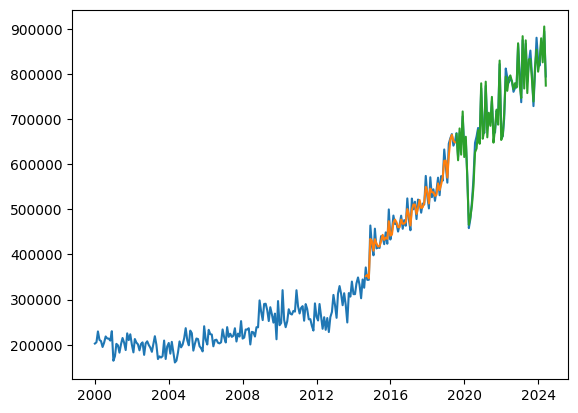

In [240]:
df_val = pd.DataFrame(prediccion_val,index=consumo_regular[(entrenamiento):entrenamiento+val_prueba].index)
df_test = pd.DataFrame(prediccion_test,index=consumo_regular[entrenamiento+len(df_val):len(consumo_drop['Total'])].index)


plt.plot(consumo_regular['Gasolina regular'])
plt.plot(df_val)
plt.plot(df_test)

